In [1]:
# The first step in data cleaning is to import all libraries needed:

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import argparse
import datetime
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# using the relative path to create the engine:
eng = create_engine('sqlite:///../data/raw/almsasantos.db')

# Or we could use the absolute path to create the engine:
# eng = create_engine('sqlite:////home/almsasantos/Desktop/Ironhack/Project_Pandas_Pipeline/Ironhack-Module-1-Project-Pandas-Pipeline/data/raw/almsasantos.db')

In [3]:
business_info = pd.read_sql_table('business_info', con=eng)
display(business_info)

,id,Unnamed: 0,Source,worth,worthChange,realTimeWorth,realTimePosition
0,9478,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,NaN,1
1,4608,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,NaN,2
2,8790,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,NaN,3
3,1463,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,NaN,4
4,3517,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,NaN,5
...,...,...,...,...,...,...,...
2203,4826,2255,"Fashion & Retail ==> fashion, entertainment",1.0 BUSD,0.0 millions USD,NaN,2134
2204,8947,2256,Manufacturing ==> electrical equipment,1.0 BUSD,nan millions USD,NaN,2134
2205,5744,2257,Manufacturing ==> electrical equipment,1.0 BUSD,0.0 millions USD,NaN,1856
2206,6586,2258,Manufacturing ==> printed circuit boards,1.0 BUSD,0.0 millions USD,NaN,1978


In [4]:
business_info.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2208.0,5527.846014,2580.021263,1002.0,3334.75,5493.5,7790.00,9993.0
Unnamed: 0,2208.0,1155.500000,637.539018,52.0,603.75,1155.5,1707.25,2259.0
realTimeWorth,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
realTimePosition,2208.0,1102.043478,630.218047,1.0,555.75,1106.5,1655.25,2153.0


In [5]:
# To see how many null values exist in each of column of the table business_info
business_info.isnull().sum()

id                     0
Unnamed: 0             0
Source                 0
worth                  0
worthChange            0
realTimeWorth       2208
realTimePosition       0
dtype: int64

In [6]:
# Dropping column full of nulls
null_cols = business_info.isnull().sum()


null_cols = null_cols[null_cols>0]/len(business_info) *100
null_filter = null_cols >= 100

drop_cols = list(null_cols[null_filter].index)
business_info.drop(drop_cols, axis=1, inplace=True)

business_info

,id,Unnamed: 0,Source,worth,worthChange,realTimePosition
0,9478,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,1
1,4608,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,2
2,8790,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,3
3,1463,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,4
4,3517,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,5
...,...,...,...,...,...,...
2203,4826,2255,"Fashion & Retail ==> fashion, entertainment",1.0 BUSD,0.0 millions USD,2134
2204,8947,2256,Manufacturing ==> electrical equipment,1.0 BUSD,nan millions USD,2134
2205,5744,2257,Manufacturing ==> electrical equipment,1.0 BUSD,0.0 millions USD,1856
2206,6586,2258,Manufacturing ==> printed circuit boards,1.0 BUSD,0.0 millions USD,1978


In [7]:
business_info.drop('Unnamed: 0', axis=1 ,inplace=True)
business_info

,id,Source,worth,worthChange,realTimePosition
0,9478,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,1
1,4608,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,2
2,8790,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,3
3,1463,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,4
4,3517,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,5
...,...,...,...,...,...
2203,4826,"Fashion & Retail ==> fashion, entertainment",1.0 BUSD,0.0 millions USD,2134
2204,8947,Manufacturing ==> electrical equipment,1.0 BUSD,nan millions USD,2134
2205,5744,Manufacturing ==> electrical equipment,1.0 BUSD,0.0 millions USD,1856
2206,6586,Manufacturing ==> printed circuit boards,1.0 BUSD,0.0 millions USD,1978


In [8]:
business_info['worth'] = business_info.worth.str.replace('BUSD', '')
business_info['worthChange'] = business_info['worthChange'].str.replace('millions USD', '')
business_info

,id,Source,worth,worthChange,realTimePosition
0,9478,Technology ==> Amazon,112.0,0.0,1
1,4608,Technology ==> Microsoft,90.0,-0.001,2
2,8790,Finance and Investments ==> Berkshire Hathaway,84.0,-0.002,3
3,1463,Fashion & Retail ==> LVMH,72.0,0.0,4
4,3517,Technology ==> Facebook,71.0,0.0,5
...,...,...,...,...,...
2203,4826,"Fashion & Retail ==> fashion, entertainment",1.0,0.0,2134
2204,8947,Manufacturing ==> electrical equipment,1.0,nan,2134
2205,5744,Manufacturing ==> electrical equipment,1.0,0.0,1856
2206,6586,Manufacturing ==> printed circuit boards,1.0,0.0,1978


In [9]:
personal_info = pd.read_sql_table('personal_info', con=eng)

In [10]:
personal_info.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
personal_info.dropna(0, inplace=True)

In [12]:
personal_info.isnull().sum()

id          0
lastName    0
age         0
gender      0
country     0
image       0
dtype: int64

In [13]:
df1 = (personal_info.age.str.extract('(\d+) (\w+)', expand=True))
df1.columns = ['age', 'years old']
print(df1)

      age years old
0      54     years
1      62     years
2      87     years
3      69     years
4     NaN       NaN
...   ...       ...
2203   51     years
2204   55     years
2205   51     years
2206   52     years
2207   54     years

[2135 rows x 2 columns]


In [14]:
personal_info = df1.combine_first(personal_info).reindex(personal_info.index)
personal_info.drop('years old', axis=1, inplace=True)
personal_info

,age,country,gender,id,image,lastName
0,54,United States,M,9478.0,https://specials-images.forbesimg.com/imageser...,beZOS
1,62,United States,M,4608.0,https://specials-images.forbesimg.com/imageser...,GATES
2,87,None,None,8790.0,https://specials-images.forbesimg.com/imageser...,bufFEtt
3,69,None,None,1463.0,https://specials-images.forbesimg.com/imageser...,aRNAULt
4,1985,United States,Male,3517.0,https://specials-images.forbesimg.com/imageser...,zuckERBErg
...,...,...,...,...,...,...
2203,51,China,Male,4826.0,https://specials-images.forbesimg.com/imageser...,zHAO
2204,55,None,None,8947.0,https://specials-images.forbesimg.com/imageser...,zhOU
2205,51,None,M,5744.0,https://specials-images.forbesimg.com/imageser...,zHU
2206,52,Hong Kong,F,6586.0,https://specials-images.forbesimg.com/imageser...,zHUO


In [15]:
rank_info = pd.read_sql_table('rank_info', con=eng)

In [16]:
rank_info.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
rank_info

,id,name,position
0,3846,anant asaVABHOKHIN & FAMily,NaN
1,6478,arash FERDOwsi,NaN
2,9448,baNTHOON LAMSAM & FAMIly,NaN
3,2129,bill adDERLEY & FAMILy,NaN
4,1037,BORIS ZINGArevich,NaN
...,...,...,...
2255,4826,zhao XIAOQiang,2204.0
2256,8947,zhou LIANGzhang,2205.0
2257,5744,zHU XINGMING,2206.0
2258,6586,ZHUO JUn,2207.0


In [18]:
df = pd.merge(pd.merge(business_info, personal_info, on='id'), rank_info, on='id')

In [19]:
df

,id,Source,worth,worthChange,realTimePosition,age,country,gender,image,lastName,name,position
0,9478,Technology ==> Amazon,112.0,0.0,1,54,United States,M,https://specials-images.forbesimg.com/imageser...,beZOS,JEFF BEZOS,1.0
1,4608,Technology ==> Microsoft,90.0,-0.001,2,62,United States,M,https://specials-images.forbesimg.com/imageser...,GATES,BILL GATEs,2.0
2,8790,Finance and Investments ==> Berkshire Hathaway,84.0,-0.002,3,87,None,None,https://specials-images.forbesimg.com/imageser...,bufFEtt,warren BUffett,3.0
3,1463,Fashion & Retail ==> LVMH,72.0,0.0,4,69,None,None,https://specials-images.forbesimg.com/imageser...,aRNAULt,beRNARD ARNAUlt,4.0
4,3517,Technology ==> Facebook,71.0,0.0,5,1985,United States,Male,https://specials-images.forbesimg.com/imageser...,zuckERBErg,mARK ZUCKERBErg,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2130,4826,"Fashion & Retail ==> fashion, entertainment",1.0,0.0,2134,51,China,Male,https://specials-images.forbesimg.com/imageser...,zHAO,zhao XIAOQiang,2204.0
2131,8947,Manufacturing ==> electrical equipment,1.0,nan,2134,55,None,None,https://specials-images.forbesimg.com/imageser...,zhOU,zhou LIANGzhang,2205.0
2132,5744,Manufacturing ==> electrical equipment,1.0,0.0,1856,51,None,M,https://specials-images.forbesimg.com/imageser...,zHU,zHU XINGMING,2206.0
2133,6586,Manufacturing ==> printed circuit boards,1.0,0.0,1978,52,Hong Kong,F,https://specials-images.forbesimg.com/imageser...,zHUO,ZHUO JUn,2207.0


In [20]:
df = df[['id', 'name', 'lastName', 'age', 'gender', 'country', 'position', 'realTimePosition', 'Source', 'worth', 'worthChange', 'image']]
df

,id,name,lastName,age,gender,country,position,realTimePosition,Source,worth,worthChange,image
0,9478,JEFF BEZOS,beZOS,54,M,United States,1.0,1,Technology ==> Amazon,112.0,0.0,https://specials-images.forbesimg.com/imageser...
1,4608,BILL GATEs,GATES,62,M,United States,2.0,2,Technology ==> Microsoft,90.0,-0.001,https://specials-images.forbesimg.com/imageser...
2,8790,warren BUffett,bufFEtt,87,None,None,3.0,3,Finance and Investments ==> Berkshire Hathaway,84.0,-0.002,https://specials-images.forbesimg.com/imageser...
3,1463,beRNARD ARNAUlt,aRNAULt,69,None,None,4.0,4,Fashion & Retail ==> LVMH,72.0,0.0,https://specials-images.forbesimg.com/imageser...
4,3517,mARK ZUCKERBErg,zuckERBErg,1985,Male,United States,5.0,5,Technology ==> Facebook,71.0,0.0,https://specials-images.forbesimg.com/imageser...
...,...,...,...,...,...,...,...,...,...,...,...,...
2130,4826,zhao XIAOQiang,zHAO,51,Male,China,2204.0,2134,"Fashion & Retail ==> fashion, entertainment",1.0,0.0,https://specials-images.forbesimg.com/imageser...
2131,8947,zhou LIANGzhang,zhOU,55,None,None,2205.0,2134,Manufacturing ==> electrical equipment,1.0,nan,https://specials-images.forbesimg.com/imageser...
2132,5744,zHU XINGMING,zHU,51,M,None,2206.0,1856,Manufacturing ==> electrical equipment,1.0,0.0,https://specials-images.forbesimg.com/imageser...
2133,6586,ZHUO JUn,zHUO,52,F,Hong Kong,2207.0,1978,Manufacturing ==> printed circuit boards,1.0,0.0,https://specials-images.forbesimg.com/imageser...


In [21]:
df[['work_field', 'company']] = df.Source.str.split(' ==> ', expand=True)
df.drop('Source', axis=1, inplace=True)

In [22]:
df = df.rename(columns={'name': 'first_name', 'lastName': 'last_name', 'realTimePosition': \
                        'real_time_position', 'worth': 'worth(BUSD)', 'worthChange': 'worth(millions_USD)'})
df = df[['id', 'first_name', 'last_name', 'age', 'gender', 'country', 'position', 'real_time_position', \
              'worth(BUSD)', 'worth(millions_USD)', 'work_field', 'company', 'image']]

display(df)

,id,first_name,last_name,age,gender,country,position,real_time_position,worth(BUSD),worth(millions_USD),work_field,company,image
0,9478,JEFF BEZOS,beZOS,54,M,United States,1.0,1,112.0,0.0,Technology,Amazon,https://specials-images.forbesimg.com/imageser...
1,4608,BILL GATEs,GATES,62,M,United States,2.0,2,90.0,-0.001,Technology,Microsoft,https://specials-images.forbesimg.com/imageser...
2,8790,warren BUffett,bufFEtt,87,None,None,3.0,3,84.0,-0.002,Finance and Investments,Berkshire Hathaway,https://specials-images.forbesimg.com/imageser...
3,1463,beRNARD ARNAUlt,aRNAULt,69,None,None,4.0,4,72.0,0.0,Fashion & Retail,LVMH,https://specials-images.forbesimg.com/imageser...
4,3517,mARK ZUCKERBErg,zuckERBErg,1985,Male,United States,5.0,5,71.0,0.0,Technology,Facebook,https://specials-images.forbesimg.com/imageser...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,4826,zhao XIAOQiang,zHAO,51,Male,China,2204.0,2134,1.0,0.0,Fashion & Retail,"fashion, entertainment",https://specials-images.forbesimg.com/imageser...
2131,8947,zhou LIANGzhang,zhOU,55,None,None,2205.0,2134,1.0,nan,Manufacturing,electrical equipment,https://specials-images.forbesimg.com/imageser...
2132,5744,zHU XINGMING,zHU,51,M,None,2206.0,1856,1.0,0.0,Manufacturing,electrical equipment,https://specials-images.forbesimg.com/imageser...
2133,6586,ZHUO JUn,zHUO,52,F,Hong Kong,2207.0,1978,1.0,0.0,Manufacturing,printed circuit boards,https://specials-images.forbesimg.com/imageser...


In [23]:
def column_title(df, ls):
    for i in ls:
        df.update(df[i].str.title())
    return df
ls_cols = ['first_name', 'last_name', 'company']
column_title(df, ls_cols)

,id,first_name,last_name,age,gender,country,position,real_time_position,worth(BUSD),worth(millions_USD),work_field,company,image
0,9478,Jeff Bezos,Bezos,54,M,United States,1.0,1,112.0,0.0,Technology,Amazon,https://specials-images.forbesimg.com/imageser...
1,4608,Bill Gates,Gates,62,M,United States,2.0,2,90.0,-0.001,Technology,Microsoft,https://specials-images.forbesimg.com/imageser...
2,8790,Warren Buffett,Buffett,87,None,None,3.0,3,84.0,-0.002,Finance and Investments,Berkshire Hathaway,https://specials-images.forbesimg.com/imageser...
3,1463,Bernard Arnault,Arnault,69,None,None,4.0,4,72.0,0.0,Fashion & Retail,Lvmh,https://specials-images.forbesimg.com/imageser...
4,3517,Mark Zuckerberg,Zuckerberg,1985,Male,United States,5.0,5,71.0,0.0,Technology,Facebook,https://specials-images.forbesimg.com/imageser...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,4826,Zhao Xiaoqiang,Zhao,51,Male,China,2204.0,2134,1.0,0.0,Fashion & Retail,"Fashion, Entertainment",https://specials-images.forbesimg.com/imageser...
2131,8947,Zhou Liangzhang,Zhou,55,None,None,2205.0,2134,1.0,nan,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...
2132,5744,Zhu Xingming,Zhu,51,M,None,2206.0,1856,1.0,0.0,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...
2133,6586,Zhuo Jun,Zhuo,52,F,Hong Kong,2207.0,1978,1.0,0.0,Manufacturing,Printed Circuit Boards,https://specials-images.forbesimg.com/imageser...


In [24]:
# Since we had the first and last name in the column name, with the following code we have only the first
# name in the column name and the last name in the column lastName
df['first_name'] = [a.replace(b, '').strip() for a, b in zip(df['first_name'], df['last_name'])]

display(df)

,id,first_name,last_name,age,gender,country,position,real_time_position,worth(BUSD),worth(millions_USD),work_field,company,image
0,9478,Jeff,Bezos,54,M,United States,1.0,1,112.0,0.0,Technology,Amazon,https://specials-images.forbesimg.com/imageser...
1,4608,Bill,Gates,62,M,United States,2.0,2,90.0,-0.001,Technology,Microsoft,https://specials-images.forbesimg.com/imageser...
2,8790,Warren,Buffett,87,None,None,3.0,3,84.0,-0.002,Finance and Investments,Berkshire Hathaway,https://specials-images.forbesimg.com/imageser...
3,1463,Bernard,Arnault,69,None,None,4.0,4,72.0,0.0,Fashion & Retail,Lvmh,https://specials-images.forbesimg.com/imageser...
4,3517,Mark,Zuckerberg,1985,Male,United States,5.0,5,71.0,0.0,Technology,Facebook,https://specials-images.forbesimg.com/imageser...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,4826,Xiaoqiang,Zhao,51,Male,China,2204.0,2134,1.0,0.0,Fashion & Retail,"Fashion, Entertainment",https://specials-images.forbesimg.com/imageser...
2131,8947,Liangzhang,Zhou,55,None,None,2205.0,2134,1.0,nan,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...
2132,5744,Xingming,Zhu,51,M,None,2206.0,1856,1.0,0.0,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...
2133,6586,Jun,Zhuo,52,F,Hong Kong,2207.0,1978,1.0,0.0,Manufacturing,Printed Circuit Boards,https://specials-images.forbesimg.com/imageser...


In [25]:
# This command is necessary to check the values we have in this series:
df['gender'].value_counts()

M         1102
None       478
Male       375
F          150
Female      30
Name: gender, dtype: int64

In [26]:
df.gender.replace('Male', 'M', inplace=True)
df.gender.replace('Female', 'F', inplace=True)
display(df)

,id,first_name,last_name,age,gender,country,position,real_time_position,worth(BUSD),worth(millions_USD),work_field,company,image
0,9478,Jeff,Bezos,54,M,United States,1.0,1,112.0,0.0,Technology,Amazon,https://specials-images.forbesimg.com/imageser...
1,4608,Bill,Gates,62,M,United States,2.0,2,90.0,-0.001,Technology,Microsoft,https://specials-images.forbesimg.com/imageser...
2,8790,Warren,Buffett,87,None,None,3.0,3,84.0,-0.002,Finance and Investments,Berkshire Hathaway,https://specials-images.forbesimg.com/imageser...
3,1463,Bernard,Arnault,69,None,None,4.0,4,72.0,0.0,Fashion & Retail,Lvmh,https://specials-images.forbesimg.com/imageser...
4,3517,Mark,Zuckerberg,1985,M,United States,5.0,5,71.0,0.0,Technology,Facebook,https://specials-images.forbesimg.com/imageser...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,4826,Xiaoqiang,Zhao,51,M,China,2204.0,2134,1.0,0.0,Fashion & Retail,"Fashion, Entertainment",https://specials-images.forbesimg.com/imageser...
2131,8947,Liangzhang,Zhou,55,None,None,2205.0,2134,1.0,nan,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...
2132,5744,Xingming,Zhu,51,M,None,2206.0,1856,1.0,0.0,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...
2133,6586,Jun,Zhuo,52,F,Hong Kong,2207.0,1978,1.0,0.0,Manufacturing,Printed Circuit Boards,https://specials-images.forbesimg.com/imageser...


In [27]:
# Since most of people are male, we can fill the gender nulls as M:
df['gender'].replace('None', 'M', inplace=True)

In [29]:
# Transform all ages to correct numbers:
current_year = datetime.datetime.today().year

age = []
for i in df['age']:
    if len(i) == 4:
        age.append(str(current_year-int(i)))
    else:
        age.append(i)


df['age'] = age
display(df)

,id,first_name,last_name,age,gender,country,position,real_time_position,worth(BUSD),worth(millions_USD),work_field,company,image
0,9478,Jeff,Bezos,54,M,United States,1.0,1,112.0,0.0,Technology,Amazon,https://specials-images.forbesimg.com/imageser...
1,4608,Bill,Gates,62,M,United States,2.0,2,90.0,-0.001,Technology,Microsoft,https://specials-images.forbesimg.com/imageser...
2,8790,Warren,Buffett,87,M,None,3.0,3,84.0,-0.002,Finance and Investments,Berkshire Hathaway,https://specials-images.forbesimg.com/imageser...
3,1463,Bernard,Arnault,69,M,None,4.0,4,72.0,0.0,Fashion & Retail,Lvmh,https://specials-images.forbesimg.com/imageser...
4,3517,Mark,Zuckerberg,34,M,United States,5.0,5,71.0,0.0,Technology,Facebook,https://specials-images.forbesimg.com/imageser...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,4826,Xiaoqiang,Zhao,51,M,China,2204.0,2134,1.0,0.0,Fashion & Retail,"Fashion, Entertainment",https://specials-images.forbesimg.com/imageser...
2131,8947,Liangzhang,Zhou,55,M,None,2205.0,2134,1.0,nan,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...
2132,5744,Xingming,Zhu,51,M,None,2206.0,1856,1.0,0.0,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...
2133,6586,Jun,Zhuo,52,F,Hong Kong,2207.0,1978,1.0,0.0,Manufacturing,Printed Circuit Boards,https://specials-images.forbesimg.com/imageser...


In [30]:
# The function change_types receives a list of columns of the df as an argument and will convert its type
# to float, so it's possible to operate with them.
def change_to_float_type(l):
    for i in l:
        df[i] = df[i].astype(float)
change_to_float_type(['worth(BUSD)', 'worth(millions_USD)'])

In [31]:
def change_to_int_type(l):
    for i in l:
        df[i] = df[i].astype(int)
change_to_int_type(['age', 'position'])

df.dtypes

id                       int64
first_name              object
last_name               object
age                      int64
gender                  object
country                 object
position                 int64
real_time_position       int64
worth(BUSD)            float64
worth(millions_USD)    float64
work_field              object
company                 object
image                   object
dtype: object

In [32]:
#df.dropna(subset=['worth(millions_USD)', 'gender', 'country'], how='all', inplace=True)

In [33]:
df.isnull().sum()

id                       0
first_name               0
last_name                0
age                      0
gender                   0
country                  0
position                 0
real_time_position       0
worth(BUSD)              0
worth(millions_USD)    106
work_field               0
company                  0
image                    0
dtype: int64

In [38]:
df['diff_position'] = df['position'] - df['real_time_position']
display(df)

,id,first_name,last_name,age,gender,country,position,real_time_position,worth(BUSD),worth(millions_USD),work_field,company,image,diff_position
0,9478,Jeff,Bezos,54,M,United States,1,1,112.0,0.000,Technology,Amazon,https://specials-images.forbesimg.com/imageser...,0
1,4608,Bill,Gates,62,M,United States,2,2,90.0,-0.001,Technology,Microsoft,https://specials-images.forbesimg.com/imageser...,0
2,8790,Warren,Buffett,87,M,None,3,3,84.0,-0.002,Finance and Investments,Berkshire Hathaway,https://specials-images.forbesimg.com/imageser...,0
3,1463,Bernard,Arnault,69,M,None,4,4,72.0,0.000,Fashion & Retail,Lvmh,https://specials-images.forbesimg.com/imageser...,0
4,3517,Mark,Zuckerberg,34,M,United States,5,5,71.0,0.000,Technology,Facebook,https://specials-images.forbesimg.com/imageser...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,4826,Xiaoqiang,Zhao,51,M,China,2204,2134,1.0,0.000,Fashion & Retail,"Fashion, Entertainment",https://specials-images.forbesimg.com/imageser...,70
2131,8947,Liangzhang,Zhou,55,M,None,2205,2134,1.0,NaN,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...,71
2132,5744,Xingming,Zhu,51,M,None,2206,1856,1.0,0.000,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...,350
2133,6586,Jun,Zhuo,52,F,Hong Kong,2207,1978,1.0,0.000,Manufacturing,Printed Circuit Boards,https://specials-images.forbesimg.com/imageser...,229


In [34]:
df.groupby(['work_field', 'company', 'worth(millions_USD)']).max().sort_values(by='work_field', ascending=False)

id  \
work_field  company                       worth(millions_USD)         
Telecom     Telecoms, Media, Oil-Services  0.005               6892   
            Telecom                       -0.392               1371   
            Communications                 0.000               2468   
            Communications Equipment       0.001               2540   
            Electronics                    0.000               1045   
...                                                             ...   
Automotive  Tractors                       0.000               7277   
            U-Haul                         0.000               9284   
                                           0.001               9321   
            Used Cars                      0.000               6738   
            Art, Car Dealerships           0.000               2461   

                                                                 first_name  \
work_field  company                       worth(millions_USD)                 
Telecom     Telecoms, Media, Oil-Services  0.005                     Ananda   
            Telecom                       -0.392                     Naguib   
            Communications                 0.000                   Mohammed   
            Communications Equipment       0.001                   Qingzhou   
            Electronics                    0.000                    Kaiting   
...                                                                     ...   
Automotive  Tractors                       0.000               Lachhman Das   
            U-Haul                         0.000                     E. Joe   
                                           0.001                       Mark   
            Used Cars                      0.000               Ernest , Ii.   
            Art, Car Dealerships           0.000                     Norman   

                                                              last_name  age  \
work_field  company                       worth(millions_USD)                  
Telecom     Telecoms, Media, Oil-Services  0.005               Krishnan   80   
            Telecom                       -0.392                Sawiris   64   
            Communications                 0.000                Ibrahim   72   
            Communications Equipment       0.001                   Chen   52   
            Electronics                    0.000                     Wu   48   
...                                                                 ...  ...   
Automotive  Tractors                       0.000                 Mittal   87   
            U-Haul                         0.000                  Shoen   68   
                                           0.001                  Shoen   67   
            Used Cars                      0.000                 Garcia   61   
            Art, Car Dealerships           0.000                 Braman   85   

                                                              gender  \
work_field  company                       worth(millions_USD)          
Telecom     Telecoms, Media, Oil-Services  0.005                   M   
            Telecom                       -0.392                   M   
            Communications                 0.000                   M   
            Communications Equipment       0.001                   M   
            Electronics                    0.000                   M   
...                                                              ...   
Automotive  Tractors                       0.000                   M   
            U-Haul                         0.000                   M   
                                           0.001                   M   
            Used Cars                      0.000                   M   
            Art, Car Dealerships           0.000                   M   

                                                                     country  \
work_field  company                       worth(million

In [35]:
df.loc[df['age'] == 'N', :]

,id,first_name,last_name,age,gender,country,position,real_time_position,worth(BUSD),worth(millions_USD),work_field,company,image


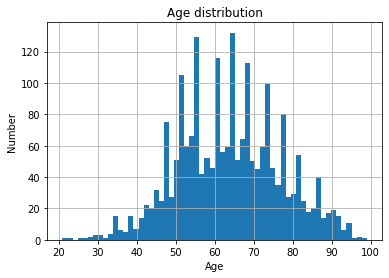

In [36]:
df.age.hist(bins=60)
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Age distribution')
plt.show()

In [37]:
df.describe()

,id,age,position,real_time_position,worth(BUSD),worth(millions_USD)
count,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2029.000000
mean,5544.162061,63.788290,1109.892740,1106.622951,4.094239,-0.505793
std,2582.167383,13.119598,636.847166,628.971557,6.977430,26.793213
min,1002.000000,21.000000,1.000000,1.000000,1.000000,-672.311000
25%,3348.500000,54.000000,560.500000,563.500000,1.400000,0.000000
50%,5511.000000,64.000000,1112.000000,1112.000000,2.200000,0.000000
75%,7817.500000,73.000000,1658.500000,1656.500000,4.000000,0.000000
max,9993.000000,99.000000,2208.000000,2153.000000,112.000000,530.206000
